In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import sklearn.metrics as metrics
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications import VGG16

In [2]:
num_classes=3
IMAGE_SHAPE = [224, 224]
batch_size=32 #change for better accuracy based on your dataset
epochs = 10 #change for better accuracy based on your dataset

In [6]:
vgg = VGG16(input_shape = (224,224,3), weights = 'imagenet', include_top = False)
for layer in vgg.layers:
    layer.trainable = False
x = Flatten()(vgg.output)
x = Dense(128, activation = 'relu')(x) 
x = Dense(64, activation = 'relu')(x) 
x = Dense(num_classes, activation = 'softmax')(x) 
model = Model(inputs = vgg.input, outputs = x)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
trdata = ImageDataGenerator()
train_data_gen = trdata.flow_from_directory(directory='Train',target_size=(224,224), shuffle=False, class_mode='categorical')
tsdata = ImageDataGenerator()
test_data_gen = tsdata.flow_from_directory(directory='Test', target_size=(224,224),shuffle=False, class_mode='categorical')

Found 584 images belonging to 3 classes.
Found 72 images belonging to 3 classes.


In [8]:
training_steps_per_epoch = int(np.ceil(train_data_gen.samples / batch_size))
validation_steps_per_epoch = int(np.ceil(test_data_gen.samples / batch_size))
model.fit(train_data_gen, steps_per_epoch = training_steps_per_epoch, validation_data=test_data_gen, validation_steps=validation_steps_per_epoch,epochs=epochs, verbose=1)
print('Training Completed!')

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 65s 3s/step - accuracy: 0.4537 - loss: 83.7066 - val_accuracy: 0.7222 - val_loss: 7.9739
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step - accuracy: 0.8560 - loss: 2.6644 - val_accuracy: 0.9167 - val_loss: 2.5214
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step - accuracy: 0.9760 - loss: 0.2770 - val_accuracy: 0.9583 - val_loss: 1.1979
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 63s 3s/step - accuracy: 0.9992 - loss: 0.0055 - val_accuracy: 0.9444 - val_loss: 3.3818
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 64s 3s/step - accuracy: 1.0000 - loss: 3.6210e-05 - val_accuracy: 0.9444 - val_loss: 2.5152
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 64s 3s/step - accuracy: 1.0000 - loss: 1.1932e-06 - val_accuracy: 0.9444 - val_loss: 2.3826
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 64s 3s/step - accuracy: 1.0000 - loss: 8.6764e-07 - val_accuracy: 0.9444 - val_loss: 2.3628
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 64s 3s/step - accuracy: 1.0000 - loss: 3.3822e-07 - val_accuracy: 0

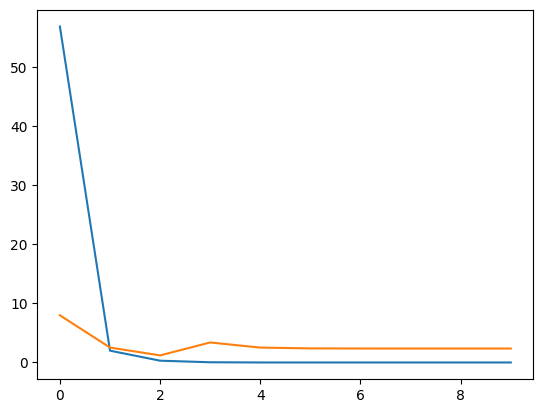

In [9]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])


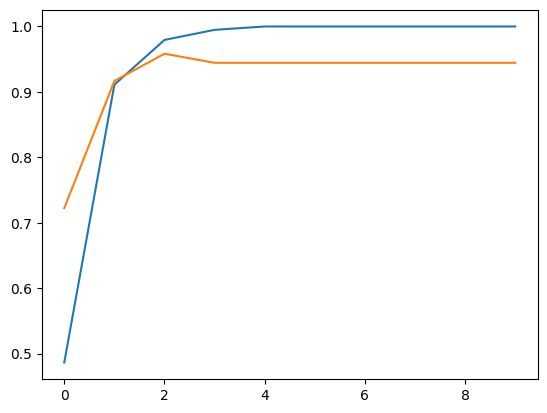

In [11]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])


In [12]:
Y_pred = model.predict(test_data_gen, test_data_gen.samples / batch_size)
val_preds = np.argmax(Y_pred, axis=1)
import sklearn.metrics as metrics
val_trues =test_data_gen.classes
from sklearn.metrics import classification_report
print(classification_report(val_trues, val_preds))

3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        24
           1       1.00      1.00      1.00        24
           2       0.86      1.00      0.92        24

    accuracy                           0.94        72
   macro avg       0.95      0.94      0.94        72
weighted avg       0.95      0.94      0.94        72



In [13]:
Y_pred = model.predict(test_data_gen, test_data_gen.samples / batch_size)
val_preds = np.argmax(Y_pred, axis=1)
val_trues =test_data_gen.classes
cm = metrics.confusion_matrix(val_trues, val_preds)
cm

3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step


array([[20,  0,  4],
       [ 0, 24,  0],
       [ 0,  0, 24]])

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay

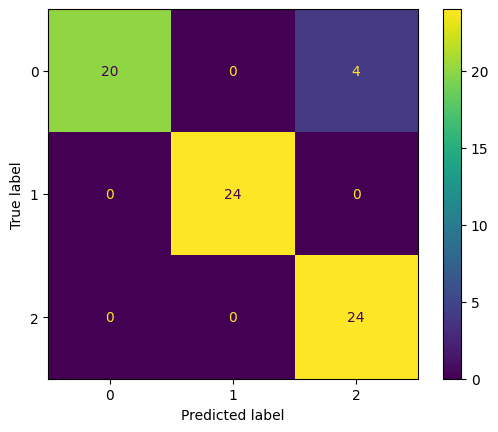

In [16]:
ConfusionMatrixDisplay(cm).plot()

In [17]:
keras_file="Model.h5"
tf.keras.models.save_model(model,keras_file)

In [18]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
#load saved model
model = load_model('Model.h5') 
img_path = 'istockphoto-185284489-612x612.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds=model.predict(x)
# create a list containing the class labels
class_labels = ['Apple','Banana','Orange']
# find the index of the class with maximum score
pred = np.argmax(preds, axis=-1)
# print the label of the class with maximum score
print(class_labels[pred[0]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step
Orange
